###

1. There are more rides in Urban cities than Suburban / Rural.

2. The avergae fare is higher for Rural

3. Since the number of rides and hence drivers are higher for Urban cities, the total fare is also highest for Urban.

In [215]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_f = os.path.join("data", "city_data.csv")
ride_f = os.path.join("data", "ride_data.csv")
out_f = os.path.join("data", "City_Ride_Scatter.png")
out_fare_f = os.path.join("data", "City_Ride_Fares_pie.png")
out_rides_f = os.path.join("data", "City_Ride_Count_pie.png")
out_drivers_f = os.path.join("data", "City_Drivers_Count_pie.png")

# Read the City and Ride Data
city_df = pd.read_csv(city_f)
ride_df = pd.read_csv(ride_f)

# Combine the data into a single dataset
all_df = pd.merge(city_df, ride_df, how="outer", on="city")


In [123]:
# Display the data table for preview
all_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data


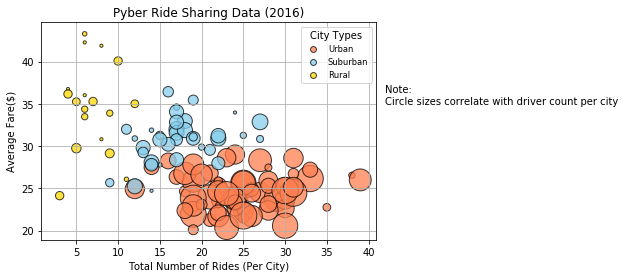

In [185]:
# Obtain the x and y coordinates for each of the three city types

u_df = all_df.loc[all_df['type'] == 'Urban',:]
u_grp_df = u_df.groupby('city')
num_rides_per_city_u = u_grp_df['ride_id'].count()
average_fare_per_city_u = u_grp_df['fare'].mean()
driver_count_per_city_u = u_grp_df['driver_count'].min()

s_df = all_df.loc[all_df['type'] == 'Suburban',:]
s_grp_df = s_df.groupby('city')
num_rides_per_city_s = s_grp_df['ride_id'].count()
average_fare_per_city_s = s_grp_df['fare'].mean()
driver_count_per_city_s = s_grp_df['driver_count'].min()

r_df = all_df.loc[all_df['type'] == 'Rural',:]
r_grp_df = r_df.groupby('city')
num_rides_per_city_r = r_grp_df['ride_id'].count()
average_fare_per_city_r = r_grp_df['fare'].mean()
driver_count_per_city_r = r_grp_df['driver_count'].min()

# Build the scatter plots for each city types
plt.scatter(num_rides_per_city_u , average_fare_per_city_u, s=driver_count_per_city_u*10, color='Coral', edgecolors="black", label = 'Urban', alpha=0.75 )
plt.scatter(num_rides_per_city_s , average_fare_per_city_s, s=driver_count_per_city_s*10, color='SkyBlue', edgecolors="black", label = 'Suburban', alpha=0.75 )
plt.scatter(num_rides_per_city_r , average_fare_per_city_r, s=driver_count_per_city_r*10, color='Gold', edgecolors="black", label = 'Rural', alpha=0.75 )

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Create a legend
lgnd = plt.legend(loc='upper right', title="City Types", numpoints=1, ncol=1, fontsize = 'small', fancybox=True)

for handle in lgnd.legendHandles:
    handle.set_sizes([35.0])
    
# Incorporate a text label regarding circle size
plt.text( 42,35,'Note: \nCircle sizes correlate with driver count per city')

# Save Figure
plt.savefig(out_f)

# Show plot
plt.show()


## Total Fares by City Type

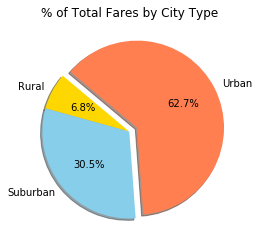

In [208]:
# Calculate Type Percents

fare_grp_df = all_df.groupby('type')

sum_df = fare_grp_df['fare'].sum()

labels = sum_df.keys()

colors = ['Gold', 'SkyBlue', 'Coral']

explode = (0, 0, 0.10)
# Build Pie Chart
plt.pie(sum_df, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig(out_fare_f)

# Show Figure
plt.show()




## Total Rides by City Type

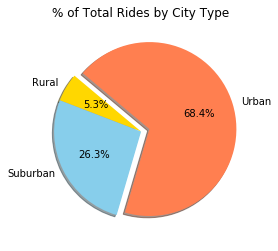

In [210]:
# Calculate Ride Percents

fare_grp_df = all_df.groupby('type')

count_df = fare_grp_df['ride_id'].count()

labels = count_df.keys()

colors = ['Gold', 'SkyBlue', 'Coral']

explode = (0, 0, 0.10)

# Build Pie Chart
plt.pie(count_df, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig(out_rides_f)

# Show Figure
plt.show()

## Total Drivers by City Type

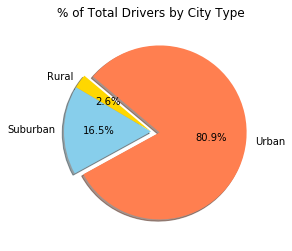

In [218]:
# Calculate Driver Percents

city_grp_type_df = city_df.groupby('type')

num_drivers_type_df = city_grp_type_df['driver_count'].sum()

labels = num_drivers_type_df.keys()

colors = ['Gold', 'SkyBlue', 'Coral']

explode = (0, 0, 0.10)

# Build Pie Charts
plt.pie(num_drivers_type_df, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig(out_drivers_f)

# Show Figure
plt.show()
